In [1]:
import numpy as np

# spike times of pre and post synaptic neurons
spike_times_post = [10, 70, 110, 140]
spike_times_pre = [5, 80, 115, 135]

# initial syaptic weight
w_mstdpet = w_mstdp = w_stdp= 0.2

# parameters from the paper
gamma = 0.2
beta = 0.9
tau_z = 25
gamma_0 = gamma / tau_z
dt = 1
r = 1
z = 0
P_pre = 0
P_pos = 0
tau_pre = 20
tau_pos = 20
A_pre = 1
A_pos = -1

# traces for plotting
trace_fj = []
trace_fi = []
trace_P_pre =[]
trace_P_pos =[]
trace_zeta = []
trace_z = []
trace_r = []
trace_w_mstdpet = []
trace_w_mstdp = []
trace_w_stdp = []

# simulation for 200 ms
for t in range(200):
    
    f_j = float(t in spike_times_pre)
    f_i = float(t in spike_times_post)
    
    # Equations 43 and 44 
    P_pre = P_pre * np.exp(-dt / tau_pre) + A_pre * f_j
    P_pos = P_pos * np.exp(-dt / tau_pos) + A_pos * f_i

    # Eq. 42
    zeta = P_pre * f_i + P_pos * f_j
    
    # Elegibility trace for MSTDPET (Eq. 8)
    z = z * np.exp(-dt / tau_z) + zeta 
    
    # Eq. 7
    w_mstdpet = w_mstdpet + gamma_0 * r * z
    
    # Eq. 41
    w_mstdp = w_mstdp + gamma * r * zeta
    
    # Plain STDP without reward modulation
    w_stdp = w_stdp + gamma * zeta

    # Append traces for later
    trace_fj.append(f_j)
    trace_fi.append(f_i)
    trace_P_pre.append(P_pre)
    trace_P_pos.append(P_pos)
    trace_zeta.append(zeta)
    trace_z.append(z)
    trace_r.append(r)
    trace_w_mstdpet.append(w_mstdpet)
    trace_w_mstdp.append(w_mstdp)
    trace_w_stdp.append(w_stdp)

    # As in Fig. 1, reward becomed negative after 100 ms
    if t > 100:
        r = -1

In [2]:
%matplotlib inline

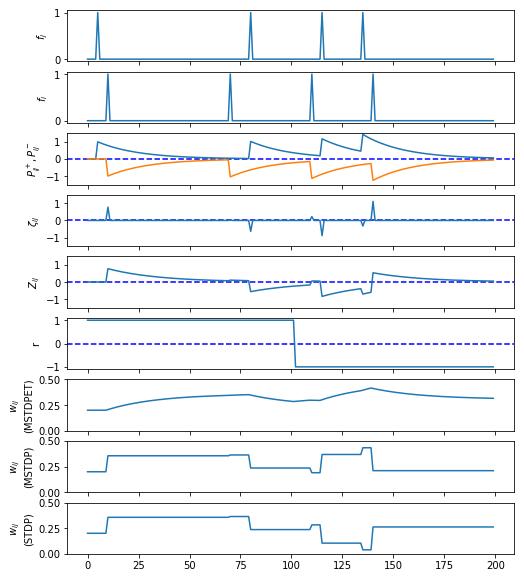

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 10]

ax1 = plt.subplot(9, 1, 1)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.plot(trace_fj)
plt.ylabel(r'$f_j$')

ax2 = plt.subplot(9, 1, 2)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.plot(trace_fi)
plt.ylabel(r'$f_i$')

ax3 = plt.subplot(9, 1, 3)
ax3.set_ylim([-1.5, 1.5])
plt.setp(ax3.get_xticklabels(), visible=False)
plt.axhline(linestyle='--', color='b')
plt.plot(trace_P_pre)
plt.plot(trace_P_pos)
plt.ylabel(r'$P_{ij}^+, P_{ij}^-$')

ax4 = plt.subplot(9, 1, 4, sharex=ax1)
ax4.set_ylim([-1.5, 1.5])
plt.setp(ax4.get_xticklabels(), visible=False)
plt.axhline(linestyle='--', color='b')
plt.plot(trace_zeta)
plt.ylabel(r'$\zeta_{ij}$')

ax5 = plt.subplot(9, 1, 5, sharex=ax1)
ax5.set_ylim([-1.5, 1.5])
plt.setp(ax5.get_xticklabels(), visible=False)
plt.axhline(linestyle='--', color='b')
plt.plot(trace_z)
plt.ylabel(r'$Z_{ij}$')

ax6 = plt.subplot(9, 1, 6, sharex=ax1)
plt.setp(ax6.get_xticklabels(), visible=False)
plt.axhline(linestyle='--', color='b')
plt.plot(trace_r)
plt.ylabel('r')

ax7 = plt.subplot(9, 1, 7, sharex=ax1)
ax7.set_ylim([0.0, 0.5])
plt.setp(ax7.get_xticklabels(), visible=False)
plt.plot(trace_w_mstdpet)
plt.ylabel(r'$w_{ij}$' + '\n' + '(MSTDPET)')

ax8 = plt.subplot(9, 1, 8, sharex=ax1)
ax8.set_ylim([0.0, 0.5])
plt.setp(ax8.get_xticklabels(), visible=False)
plt.plot(trace_w_mstdp)
plt.ylabel(r'$w_{ij}$' + '\n' + '(MSTDP)')

ax9 = plt.subplot(9, 1, 9, sharex=ax1)
ax9.set_ylim([0.0, 0.5])
plt.plot(trace_w_stdp)
plt.ylabel(r'$w_{ij}$' + '\n' + '(STDP)')

plt.show()